In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#### Laplace Equation in 2D

$u_{xx} + u_{yy} = 0$

1. Length along x and y
2. internal grid points along x and y 
3. dx, dy
4. Boundary conditions
5. Iterative fromulation

In [35]:
#Iterative scheme

Lx = 1.0
Ly = 1.0

nx = 3
ny = 3

x = np.linspace(0, Lx, nx+2)
print(x)

y = np.linspace(0, Ly, ny+2)
print(y)

dx = Lx/(nx+1)
dy = Ly/(ny+1)


##Temperature at the boundary
Tleft = 0.
Tbottom = 0.
Tright = 0.
Ttop = 100.

#Initializing Temperature
T = np.empty((nx+2,ny+2))
T.shape

# print(T)

Tguess = 10.
T.fill(Tguess)

#Boundary conditions
T[0,:]=Tleft

T[(nx+1):,:]=Tright

T[:,(ny+1):]=Ttop

T[:,0]=Tbottom

print(T)

maxiter = 50

for iter in range(0,maxiter):
    for i in range(1,nx+1):
        for j in range(1, ny+1):
            T[i,j]=((dy**2)*(T[i+1,j]+T[i-1,j]) + (dx**2)*(T[i,j+1]+T[i,j-1]))/(2*(dx**2+dy**2))

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]
[[  0.   0.   0.   0. 100.]
 [  0.  10.  10.  10. 100.]
 [  0.  10.  10.  10. 100.]
 [  0.  10.  10.  10. 100.]
 [  0.   0.   0.   0. 100.]]


In [36]:
print(T)

[[  0.           0.           0.           0.         100.        ]
 [  0.           7.14285714  18.75        42.85714286 100.        ]
 [  0.           9.82142857  25.          52.67857143 100.        ]
 [  0.           7.14285714  18.75        42.85714286 100.        ]
 [  0.           0.           0.           0.         100.        ]]


In [37]:
X,Y = np.meshgrid(x,y, indexing='ij')

Text(0.5, 1.0, 'Temperature field')

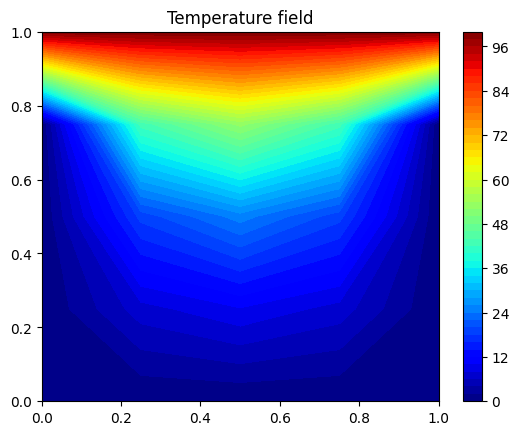

In [38]:
# Contour plot color settings
colorinterpolation = 50
colorMap = plt.cm.jet

fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
y = ax.contourf(X,Y,T,colorinterpolation, cmap=colorMap)
fig.colorbar(y)
ax.set_title('Temperature field')

In [39]:
#Direct approach

k = 3

I = np.eye(k,k)
I

d = np.ones(k)

MM = sp.sparse.diags([d,-2*d,d], [-1,0,1], shape=(k,k))
M = MM.toarray()

In [40]:
S = np.kron(M,I)+np.kron(I,M)
S

array([[-4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -4.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1., -4.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -4.]])

In [42]:
def get_A(k):
    e = np.ones((k))
    I = np.eye(k,k)
    MM = sp.sparse.diags([e, -2*e, e],offsets=[-1, 0,1], shape=(k,k))
    M = MM.toarray()
    S = np.kron(M,I) + np.kron(I,M)
    return S

In [43]:
Lx = 1.0
Ly = 1.0

nx = 3
ny = 3

x = np.linspace(0, Lx, nx+2)
# print(x)

y = np.linspace(0, Ly, ny+2)
# print(y)

dx = Lx/(nx+1)
dy = Ly/(ny+1)


##Temperature at the boundary
Tleft = 0.
Tbottom = 0.
Tright = 100.
Ttop = 100.

#Initializing Temperature
T = np.empty((nx+2,ny+2))
T.shape


Tguess = 10.
T.fill(Tguess)

#Boundary conditions
T[0,:]=Tleft

T[(nx+1):,:]=Tright

T[:,(ny+1):]=Ttop

T[:,0]=Tbottom

# print(T)

## Now get A matrix

A = get_A(nx)

print(A)


## get b

bvert = np.zeros(ny*nx)
bhor = np.zeros(nx*ny)

for i in range(1,ny+1):
    bvert[i-1] = T[0,i]
    bvert[ny**2 - i] = T[ny+1, ny-i+1]
    
# print(bvert)

for i in range(1,nx+1):
    bhor[(i-1)*nx]= T[i,0]
    bhor[(i-1)*nx + (nx-1)] = T[i, nx+1]
    
# print(bhor)

b = -bvert -bhor

#Solve Ax=b

sol = sp.linalg.solve(A,b)
print(sol)

sol.reshape(3,3)

T[1:-1,1:-1] = sol.reshape(3,3)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.]]
[14.28571429 28.57142857 50.         28.57142857 50.         71.42857143
 50.         71.42857143 85.71428571]


In [44]:
print(T)

[[  0.           0.           0.           0.         100.        ]
 [  0.          14.28571429  28.57142857  50.         100.        ]
 [  0.          28.57142857  50.          71.42857143 100.        ]
 [  0.          50.          71.42857143  85.71428571 100.        ]
 [  0.         100.         100.         100.         100.        ]]


In [45]:
X,Y = np.meshgrid(x,y, indexing='ij')

Text(0.5, 1.0, 'Temperature field')

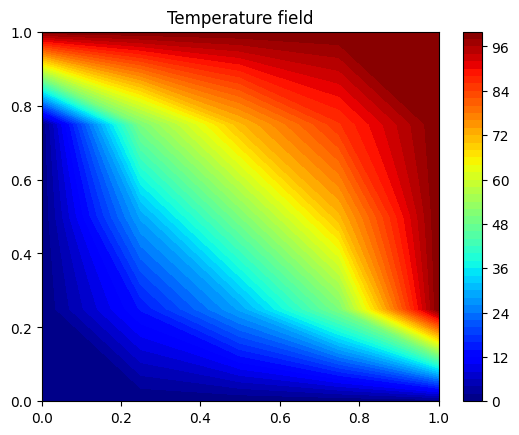

In [46]:
# Contour plot color settings
colorinterpolation = 50
colorMap = plt.cm.jet

fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
y = ax.contourf(X,Y,T,colorinterpolation, cmap=colorMap)
fig.colorbar(y)
ax.set_title('Temperature field')